# LINEAR REGRESSION

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


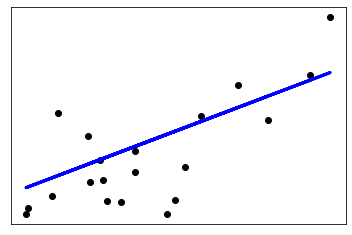

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# NAIVE BAYES EXAMPLE

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#load the csv file
df=pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Replace Species type with numbers
df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

In [ ]:
#Initialize Gaussian Naive Bayes
clf = GaussianNB()

# Split-out validation dataset
array = df.values
X = array[:,1:5]
Y = array[:,5]

In [ ]:
print("Input=", X)
print("Output=", Y)

Input= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9

In [ ]:
# One-third of data as a part of test set
validation_size = 0.33

In [ ]:
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'

In [ ]:
#Fitting the training set
clf.fit(X_train, Y_train) 

#Predicting for the Test Set
pred_clf = clf.predict(X_validation)

#Prediction Probability
prob_pos_clf = clf.predict_proba(X_validation)[:, 1]

In [ ]:
#Create the prediction file by concatenation of the original data and predictions
#Reshaping needed to perform the concatenation
pred_clf_df = pd.DataFrame(pred_clf.reshape(50,1))
#Column renaming to indicate the predictions
pred_clf_df.rename(columns={0:'Prediction'}, inplace=True)

#reshaping the test dataset
X_validation_df = pd.DataFrame(X_validation.reshape(50,4))

#concatenating the two pandas dataframes over the columns to create a prediction dataset
pred_outcome = pd.concat([X_validation_df, pred_clf_df], axis=1)
pred_outcome = pred_outcome.reindex(X_validation_df.index)
pred_outcome.rename(columns = {0:'SepalLengthCm', 1:'SepalWidthCm', 2:'PetalLengthCm', 3:'PetalWidthCm'}, inplace=True)

del df['Id']

In [ ]:
#merging the prediction with original dataset
pred_comp = pd.merge(df,pred_outcome, on=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [ ]:
#print top 10 lines of the final predictions
print((pred_comp).head(10))
print ("\n")

#Save the file to csv
pred_comp.to_csv('Predictions.csv', sep=',')

#Save the file to Excel
from pandas import ExcelWriter

writer = ExcelWriter('IrisPredictions.xlsx')
pred_comp.to_excel(writer,'Sheet1')
writer.save()

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species  \
0            5.4           3.9            1.7           0.4        1   
1            4.9           3.1            1.5           0.1        1   
2            4.9           3.1            1.5           0.1        1   
3            4.9           3.1            1.5           0.1        1   
4            4.8           3.4            1.6           0.2        1   
5            5.1           3.5            1.4           0.3        1   
6            4.6           3.6            1.0           0.2        1   
7            5.2           3.4            1.4           0.2        1   
8            4.7           3.2            1.6           0.2        1   
9            5.2           4.1            1.5           0.1        1   

   Prediction  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  
5         1.0  
6         1.0  
7         1.0  
8         1.0  
9         1.0  




In [ ]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)

NB accuracy: 0.970000 (0.045826)


C:\Users\Cheesy.DESKTOP-28U83NF.000\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


# LOGISTIC REGRESSION EXAMPLE

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Load the data set
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [ ]:
# Plot the relation of each feature with each species

plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length'

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

SyntaxError: invalid syntax (<ipython-input-28-98e5b44f33dc>, line 18)

In [ ]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

C:\Users\Cheesy.DESKTOP-28U83NF.000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


# K-NN EXAMPLE

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [ ]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

In [ ]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

In [ ]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

<ipython-input-34-f10ca8251b19>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-34-f10ca8251b19>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


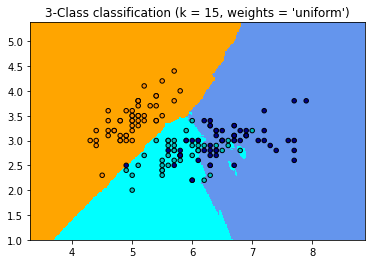

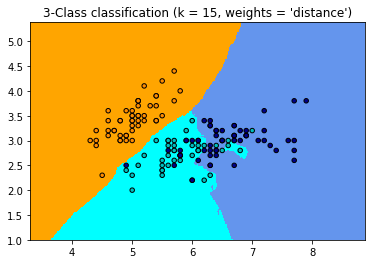

In [ ]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# RANDOM FOREST EXAMPLE

In [ ]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

In [ ]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [ ]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [ ]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [ ]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [ ]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]

In [ ]:
# View the PREDICTED species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [ ]:
# View the ACTUAL species for the first five observations
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [ ]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [ ]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.08474010289429795),
 ('sepal width (cm)', 0.022461263894393204),
 ('petal length (cm)', 0.4464851467243143),
 ('petal width (cm)', 0.4463134864869946)]